Load the dataset

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing

dataset = pd.read_csv("USA Housing Dataset.csv")
dataset.head()

/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-09 00:00:00   376000.0       3.0       2.00         1340      1384   
1  2014-05-09 00:00:00   800000.0       4.0       3.25         3540    159430   
2  2014-05-09 00:00:00  2238888.0       5.0       6.50         7270    130017   
3  2014-05-09 00:00:00   324000.0       3.0       2.25          998       904   
4  2014-05-10 00:00:00   549900.0       5.0       2.75         3060      7015   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     3.0           0     0          3        1340              0      2008   
1     2.0           0     0          3        3540              0      2007   
2     2.0           0     0          3        6420            850      2010   
3     2.0           0     0          3         798            200      2007   
4     1.0           0     0          5        1600           1460      1979   

   yr_renovated                   street       city  statezip country  
0             0  9245-9249 Fremont Ave N    Seattle  WA 98103     USA  
1             0         33001 NE 24th St  Carnation  WA 98014     USA  
2             0         7070 270th Pl SE   Issaquah  WA 98029     USA  
3             0           820 NW 95th St    Seattle  WA 98117     USA  
4             0        10834 31st Ave SW    Seattle  WA 98146     USA

Explore the dataset

In [3]:
dataset.shape

(4140, 18)

In [4]:
dataset.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

Remove unused columns

In [5]:
dataset = dataset.drop(['date','statezip','country'], axis = 'columns')
dataset.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   376000.0       3.0       2.00         1340      1384     3.0           0   
1   800000.0       4.0       3.25         3540    159430     2.0           0   
2  2238888.0       5.0       6.50         7270    130017     2.0           0   
3   324000.0       3.0       2.25          998       904     2.0           0   
4   549900.0       5.0       2.75         3060      7015     1.0           0   

   view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3        1340              0      2008             0   
1     0          3        3540              0      2007             0   
2     0          3        6420            850      2010             0   
3     0          3         798            200      2007             0   
4     0          5        1600           1460      1979             0   

                    street       city  
0  9245-9249 Fremont Ave N    Seattle  
1         33001 NE 24th St  Carnation  
2         7070 270th Pl SE   Issaquah  
3           820 NW 95th St    Seattle  
4        10834 31st Ave SW    Seattle

Create barplot to check House in each city

In [7]:
import matplotlib.pyplot as plt
# Count the number of houses in each city
city_counts = dataset['city'].value_counts()
city_counts

city
Seattle               1415
Renton                 261
Bellevue               260
Redmond                209
Kent                   167
Kirkland               166
Auburn                 162
Issaquah               162
Sammamish              158
Federal Way            131
Shoreline              112
Woodinville            103
Maple Valley            90
Mercer Island           81
Snoqualmie              65
Burien                  64
Kenmore                 58
Des Moines              52
North Bend              45
Covington               39
Duvall                  39
Lake Forest Park        33
Newcastle               31
Bothell                 30
SeaTac                  29
Vashon                  28
Tukwila                 28
Enumclaw                28
Carnation               18
Normandy Park           16
Medina                  11
Clyde Hill              10
Fall City                9
Black Diamond            7
Pacific                  6
Yarrow Point             4
Ravensdale             

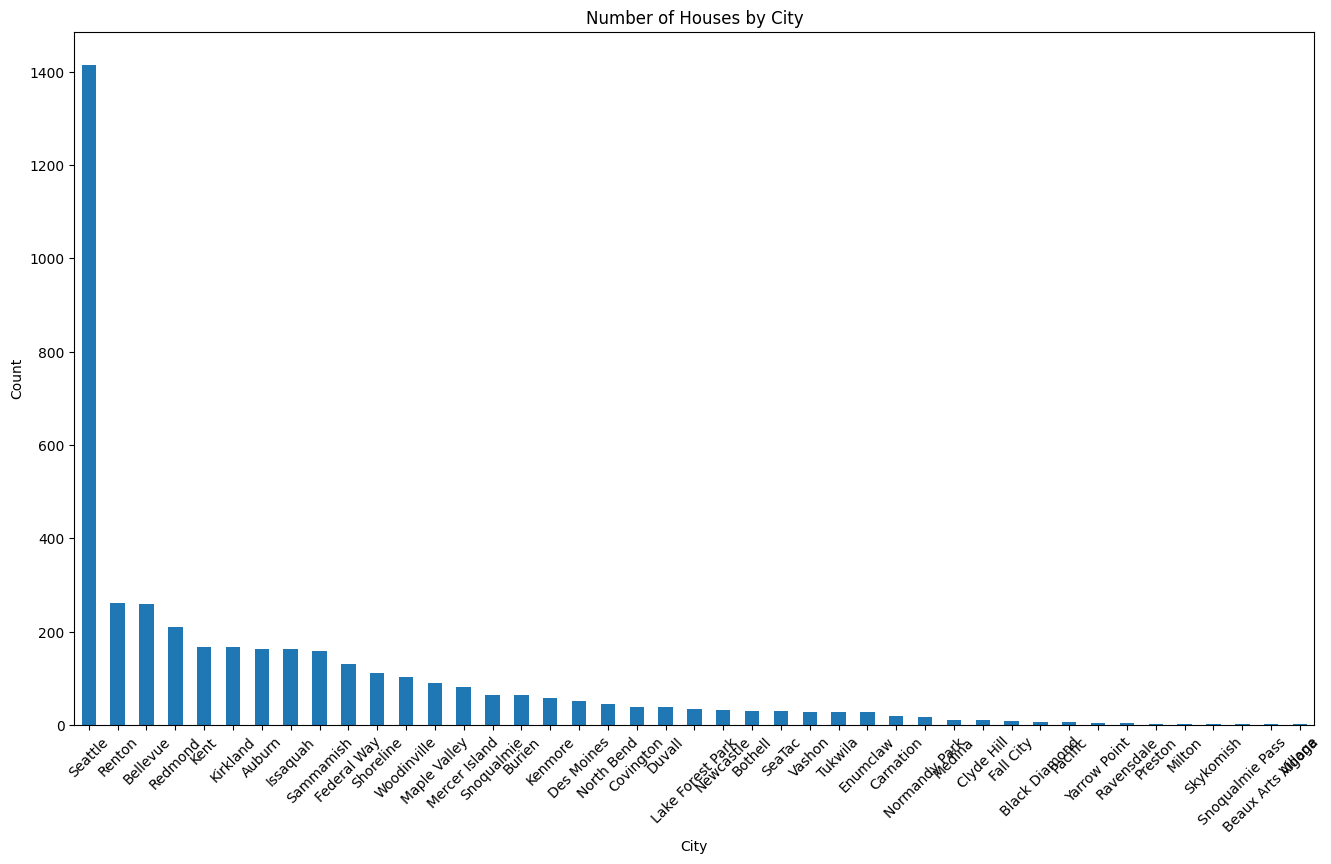

In [8]:
# Plot the bar chart
plt.figure(figsize=(16, 9))
city_counts.plot(kind='bar')
plt.title('Number of Houses by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Create barplot to check House in Street

In [9]:
# Count the number of houses in each city
street_counts = dataset['street'].value_counts()
street_counts

street
2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
14583 NE 58th St         2
14634 128th Ave NE       2
34115 SE Ash St          2
                        ..
9007 4th Ave NW          1
21924 234th Ave SE       1
4612 92nd Ave NE         1
2825 W Elmore Pl         1
18717 SE 258th St        1
Name: count, Length: 4079, dtype: int64

In [10]:
# Filter out streets with only one house
streets_greater_than_one = street_counts[street_counts > 1]
other_streets_count = street_counts[street_counts == 1].sum()
print(f'Streets with more than one house{streets_greater_than_one} and Streets with one house {other_streets_count}')

Streets with more than one housestreet
2520 Mulberry Walk NE        4
2500 Mulberry Walk NE        3
14583 NE 58th St             2
14634 128th Ave NE           2
34115 SE Ash St              2
7075-7131 Thompson Ave SE    2
8216 Linden Ave N            2
12418 NE 100th St            2
2300 14th Ave S              2
5010 Greenwood Ave N         2
11807 NE 105th Ct            2
5968 44th Ave S              2
11824 SE 203rd St            2
323 25th Ave S               2
11034 NE 26th Pl             2
11931 179th Pl NE            2
4507 Linden Ave N            2
11716 16th Ave NE            2
13420 121st Ave NE           2
611 N 46th St                2
22840 SE 269th St            2
1018 NE 96th St              2
619 9th Ave                  2
1149-1199 91st Ave NE        2
5703 Charlotte Ave SE        2
Indian Trail                 2
6520-6588 8th Ave NW         2
8434 W Mercer Way            2
21132 NE 42nd St             2
3510 S Holly St              2
2803 SW Bataan St            2


In [11]:
# Choose the top N streets to display individually
top_n = 10  # Choose the number of top streets to display
top_streets = streets_greater_than_one.head(top_n)

# Sum the counts of the remaining streets
other_count = streets_greater_than_one.sum() - top_streets.sum()

Concatenate the two series together using pd.concat() to create the aggregated_counts series

In [12]:
# Create a new series with aggregated counts
aggregated_counts = pd.concat([top_streets, pd.Series([other_count], index=['Other'])])
aggregated_counts

2520 Mulberry Walk NE         4
2500 Mulberry Walk NE         3
14583 NE 58th St              2
14634 128th Ave NE            2
34115 SE Ash St               2
7075-7131 Thompson Ave SE     2
8216 Linden Ave N             2
12418 NE 100th St             2
2300 14th Ave S               2
5010 Greenwood Ave N          2
Other                        96
dtype: int64

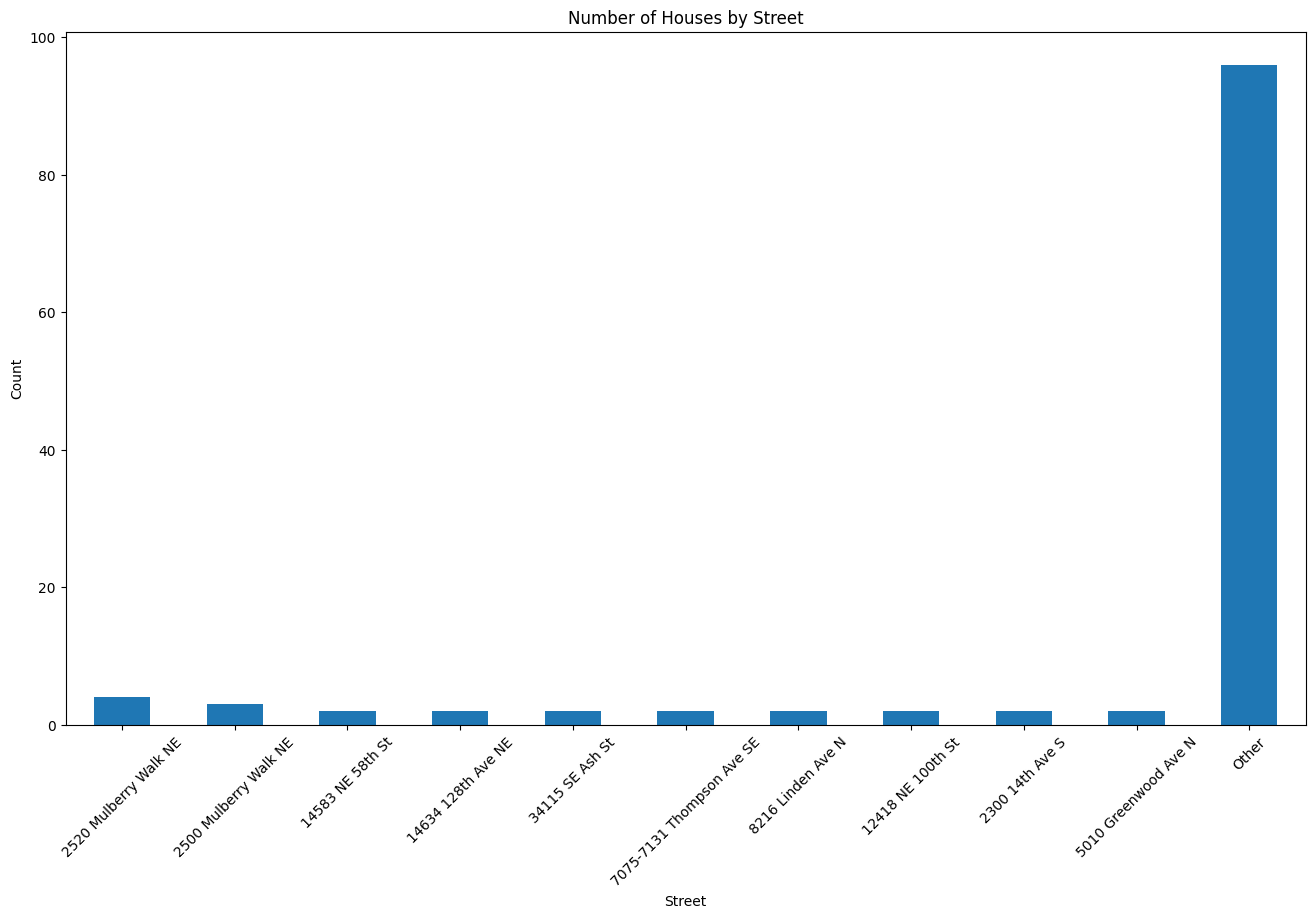

In [13]:
# Plot the bar chart
plt.figure(figsize=(16, 9))
aggregated_counts.plot(kind='bar')
plt.title('Number of Houses by Street')
plt.xlabel('Street')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4140 non-null   float64
 1   bedrooms       4140 non-null   float64
 2   bathrooms      4140 non-null   float64
 3   sqft_living    4140 non-null   int64  
 4   sqft_lot       4140 non-null   int64  
 5   floors         4140 non-null   float64
 6   waterfront     4140 non-null   int64  
 7   view           4140 non-null   int64  
 8   condition      4140 non-null   int64  
 9   sqft_above     4140 non-null   int64  
 10  sqft_basement  4140 non-null   int64  
 11  yr_built       4140 non-null   int64  
 12  yr_renovated   4140 non-null   int64  
 13  street         4140 non-null   object 
 14  city           4140 non-null   object 
dtypes: float64(4), int64(9), object(2)
memory usage: 485.3+ KB


In [15]:
dataset.select_dtypes(include = 'object').columns

Index(['street', 'city'], dtype='object')

In [16]:
len(dataset.select_dtypes(include = 'object').columns)

2

Handle categorical values

In [17]:
# Perform one-hot encoding for 'street' and 'city' columns
dataset= pd.get_dummies(dataset, columns=['street', 'city'], drop_first = True)
dataset.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   376000.0       3.0       2.00         1340      1384     3.0           0   
1   800000.0       4.0       3.25         3540    159430     2.0           0   
2  2238888.0       5.0       6.50         7270    130017     2.0           0   
3   324000.0       3.0       2.25          998       904     2.0           0   
4   549900.0       5.0       2.75         3060      7015     1.0           0   

   view  condition  sqft_above  ...  city_SeaTac  city_Seattle  \
0     0          3        1340  ...        False          True   
1     0          3        3540  ...        False         False   
2     0          3        6420  ...        False         False   
3     0          3         798  ...        False          True   
4     0          5        1600  ...        False          True   

   city_Shoreline  city_Skykomish  city_Snoqualmie  city_Snoqualmie Pass  \
0           False           False            False                 False   
1           False           False            False                 False   
2           False           False            False                 False   
3           False           False            False                 False   
4           False           False            False                 False   

   city_Tukwila  city_Vashon  city_Woodinville  city_Yarrow Point  
0         False        False             False              False  
1         False        False             False              False  
2         False        False             False              False  
3         False        False             False              False  
4         False        False             False              False  

[5 rows x 4133 columns]

In [18]:
dataset.select_dtypes(include = 'object').columns

Index([], dtype='object')

Check and handle missing values

In [19]:
dataset.isnull().values.any()

False

Feature Scaling and Feature Engineering

In [20]:
# Perform feature engineering - create a new feature 'total_area' by adding 'sqft_living' and 'sqft_lot'
dataset['total_area'] = dataset['sqft_living'] + dataset['sqft_lot']
dataset = dataset.drop(['sqft_living', 'sqft_lot'], axis = 'columns')
dataset.head(2)

price  bedrooms  bathrooms  floors  waterfront  view  condition  \
0  376000.0       3.0       2.00     3.0           0     0          3   
1  800000.0       4.0       3.25     2.0           0     0          3   

   sqft_above  sqft_basement  yr_built  ...  city_Seattle  city_Shoreline  \
0        1340              0      2008  ...          True           False   
1        3540              0      2007  ...         False           False   

   city_Skykomish  city_Snoqualmie  city_Snoqualmie Pass  city_Tukwila  \
0           False            False                 False         False   
1           False            False                 False         False   

   city_Vashon  city_Woodinville  city_Yarrow Point  total_area  
0        False             False              False        2724  
1        False             False              False      162970  

[2 rows x 4132 columns]

In [21]:
dataset.shape

(4140, 4132)

In [22]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataset.drop(['price'], axis=1))

# Create a new DataFrame with scaled features
df_scaled = pd.DataFrame(scaled_features, columns=dataset.drop(['price'], axis=1).columns)
# df_scaled.head()
# Train a Random Forest model to identify important features
X = df_scaled
y = dataset['price']